In [2]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create a set of random lat and long combinations
lats= np.random.uniform(low=-90, high=90, size=1500)
lngs=np.random.uniform(low=-90, high=90, size=1500)
lat_lngs =zip(lats, lngs)
lat_lngs

In [5]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-23.888351520660535 -71.8557088631299
89.39337376298226 -23.88703753707624
-79.38266532375962 -88.19473423163669
-27.452166434403487 -60.2661093029586
-80.2422165322203 -57.518983084857794
75.61014264633687 16.027104297027137
-35.74606828059702 -7.364378895525434
-42.51920053831081 77.60513700475434
-71.43001201734614 8.776185663927436
34.02723041700379 1.2489988677633619
-49.83027580365818 87.3910163918433
-53.4942562067042 -74.36154470659355
-52.58459064120131 74.01690724079262
11.761258612052885 44.275072039507535
-86.55014913135794 -11.281848369207523
3.9186345639312066 -68.23605219946327
-73.0190791647477 -54.22610121622165
86.91670806091031 62.03311504843063
-67.31323834313675 4.1336311360715285
35.94078969316945 56.936703173700835
-66.08939455373763 68.16405994945694
6.490053266944585 6.2553932830217605
-88.67599581496886 7.1066312294688885
9.35321467400334 52.6462576006262
-60.526507362841734 47.353794271726656
80.06029932466319 -58.886717311597565
69.68361905956257 -68.5874613

76.31232676032735 -33.46351137506369
-39.25854846218894 -58.25233649398636
-40.90893330878141 -14.860004220351058
43.801969323553834 -87.30836351901914
40.475702286759685 1.528825460957492
-80.69395934375372 60.64535504389471
-71.80256881892069 -85.16211208164408
-62.997972698564794 -50.46996975320855
80.04382955197968 18.3493939149279
-16.613102390819122 37.88142533613012
71.3156170115152 -76.04137575361398
36.89522404098348 20.6140469781064
17.808354121924808 -38.863226609063
-6.380066961058446 2.4968955832006827
-68.86063144106839 14.285688966064058
73.66981613011836 20.38670800666614
-67.05662649361507 -70.60291831001302
-31.29270049370774 -88.19414881118828
-80.29327505119555 40.67992133431437
42.58819245788948 76.84421782961812
-17.727096874454844 38.33594356398967
-73.3125521109339 -53.4231285446873
41.5614965850821 -33.74744001277428
63.63806608012982 88.7578984768852
57.835756189131615 62.063477638833035
-5.850894452560908 82.64466550591058
73.43816676678392 85.41047233621126


In [4]:
# add the lats and lngs to a list
coordinates =list(lat_lngs)

In [7]:
from citipy import citipy

In [10]:
# create a list for holding the cities
cities =[]
# identify the nearest city for each lat n lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique then add it to the cities list
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm the sufficient count
len(cities)

598

In [15]:
import requests
from config import weather_api_key
from datetime import datetime

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14fd419c1ad697fae6098b0625f08e7c


In [23]:
# create an empty list to hold weather data
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval")
print("-------------------------")
# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
    # create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the url, record and set numbers and the city.
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1
    
# run an api request for each of the cities
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # convert the date to iso standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # append the city info into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date,
                         "Max Temp": city_max_temp})
# if an error is experienced, skip the city
    except:
        print("City not found. Skipping ...")
        pass
    # indicate that Data loading is complete
print("----------------------")
print("Data Retrieval Complete")
print("----------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of set 1 | antofagasta
Processing Record 2 of set 1 | illoqqortoormiut
City not found. Skipping ...
Processing Record 3 of set 1 | punta arenas
Processing Record 4 of set 1 | presidencia roque saenz pena
Processing Record 5 of set 1 | ushuaia
Processing Record 6 of set 1 | longyearbyen
Processing Record 7 of set 1 | jamestown
Processing Record 8 of set 1 | mahebourg
Processing Record 9 of set 1 | hermanus
Processing Record 10 of set 1 | aflu
City not found. Skipping ...
Processing Record 11 of set 1 | busselton
Processing Record 12 of set 1 | souillac
Processing Record 13 of set 1 | jibuti
Processing Record 14 of set 1 | inirida
Processing Record 15 of set 1 | amderma
City not found. Skipping ...
Processing Record 16 of set 1 | sabzevar
Processing Record 17 of set 1 | taolanaro
City not found. Skipping ...
Processing Record 18 of set 1 | uromi
Processing Record 19 of set 1 | bandarbeyla
Processing Record 20 of set 1

Processing Record 188 of set 4 | somerset east
Processing Record 189 of set 4 | beisfjord
Processing Record 190 of set 4 | puerto ayacucho
Processing Record 191 of set 4 | los llanos de aridane
Processing Record 192 of set 4 | siimusti
Processing Record 193 of set 4 | corleone
Processing Record 194 of set 4 | san bernardo
Processing Record 195 of set 4 | pinjaur
Processing Record 196 of set 4 | graaff-reinet
Processing Record 197 of set 4 | barra do corda
Processing Record 198 of set 4 | komsomolskiy
Processing Record 199 of set 4 | caravelas
Processing Record 200 of set 4 | taltal
Processing Record 201 of set 4 | peniche
Processing Record 202 of set 4 | irtyshskiy
Processing Record 203 of set 4 | hobyo
Processing Record 205 of set 5 | tsihombe
City not found. Skipping ...
Processing Record 206 of set 5 | bertoua
Processing Record 207 of set 5 | tyumentsevo
Processing Record 208 of set 5 | alta floresta
Processing Record 209 of set 5 | tias
Processing Record 210 of set 5 | stokmarknes


Processing Record 377 of set 8 | gweta
Processing Record 378 of set 8 | bur gabo
City not found. Skipping ...
Processing Record 379 of set 8 | bereznik
Processing Record 380 of set 8 | ambilobe
Processing Record 381 of set 8 | veraval
Processing Record 382 of set 8 | cay
Processing Record 383 of set 8 | rosetta
Processing Record 384 of set 8 | kristianstad
Processing Record 385 of set 8 | tumannyy
City not found. Skipping ...
Processing Record 386 of set 8 | de aar
Processing Record 387 of set 8 | cayenne
Processing Record 388 of set 8 | verkhnyaya inta
Processing Record 389 of set 8 | gurupa
Processing Record 390 of set 8 | san rafael
Processing Record 391 of set 8 | sheopur
Processing Record 392 of set 8 | funadhoo
Processing Record 393 of set 8 | bjornevatn
Processing Record 394 of set 8 | luba
Processing Record 395 of set 8 | rocha
Processing Record 396 of set 8 | ponte san pietro
Processing Record 397 of set 8 | atar
Processing Record 398 of set 8 | ampanihy
Processing Record 399 

Processing Record 560 of set 11 | atbasar
Processing Record 562 of set 12 | tsienyane
City not found. Skipping ...
Processing Record 563 of set 12 | iranshahr
Processing Record 564 of set 12 | imbituba
Processing Record 565 of set 12 | kantilo
Processing Record 566 of set 12 | jalu
Processing Record 567 of set 12 | ullapool
Processing Record 568 of set 12 | kidal
Processing Record 569 of set 12 | maua
Processing Record 570 of set 12 | zlobin
Processing Record 571 of set 12 | kamenka
Processing Record 572 of set 12 | manavalakurichi
Processing Record 573 of set 12 | awjilah
Processing Record 574 of set 12 | aripuana
Processing Record 575 of set 12 | tarudant
City not found. Skipping ...
Processing Record 576 of set 12 | san jeronimo
Processing Record 577 of set 12 | fomboni
Processing Record 578 of set 12 | meulaboh
Processing Record 579 of set 12 | posse
Processing Record 580 of set 12 | olafsvik
Processing Record 581 of set 12 | punto fijo
Processing Record 582 of set 12 | memaliaj
Pr

In [24]:
len(city_data)

546

In [25]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp
0,Antofagasta,-23.6500,-70.4000,68,20,17.27,CL,2021-03-22 18:44:41,71.01
1,Punta Arenas,-53.1500,-70.9167,55,40,21.85,CL,2021-03-22 18:44:41,62.60
2,Presidencia Roque Saenz Pena,-26.7852,-60.4388,62,100,1.99,AR,2021-03-22 18:44:41,81.00
3,Ushuaia,-54.8000,-68.3000,58,75,6.91,AR,2021-03-22 18:44:42,59.00
4,Longyearbyen,78.2186,15.6401,72,20,13.80,SJ,2021-03-22 18:44:42,8.60
5,Jamestown,42.0970,-79.2353,17,1,8.84,US,2021-03-22 18:42:36,60.80
6,Mahebourg,-20.4081,57.7000,89,40,6.91,MU,2021-03-22 18:44:42,78.80
7,Hermanus,-34.4187,19.2345,77,0,5.99,ZA,2021-03-22 18:44:43,66.00
8,Busselton,-33.6500,115.3333,92,36,10.47,AU,2021-03-22 18:44:43,51.01
9,Souillac,-20.5167,57.5167,89,40,6.91,MU,2021-03-22 18:44:43,78.80


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Antofagasta,CL,2021-03-22 18:44:41,-23.6500,-70.4000,71.01,68,20,17.27
1,Punta Arenas,CL,2021-03-22 18:44:41,-53.1500,-70.9167,62.60,55,40,21.85
2,Presidencia Roque Saenz Pena,AR,2021-03-22 18:44:41,-26.7852,-60.4388,81.00,62,100,1.99
3,Ushuaia,AR,2021-03-22 18:44:42,-54.8000,-68.3000,59.00,58,75,6.91
4,Longyearbyen,SJ,2021-03-22 18:44:42,78.2186,15.6401,8.60,72,20,13.80
...,...,...,...,...,...,...,...,...,...
541,Manono,CD,2021-03-22 18:47:05,-7.3000,27.4167,69.89,95,100,1.68
542,Prescott,US,2021-03-22 18:45:39,34.5400,-112.4685,51.01,26,1,6.91
543,Vilhena,BR,2021-03-22 18:47:06,-12.7406,-60.1458,82.40,65,40,2.30
544,Kanigiri,IN,2021-03-22 18:47:06,15.4000,79.5167,75.40,68,1,4.14


In [28]:
# create an output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [30]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

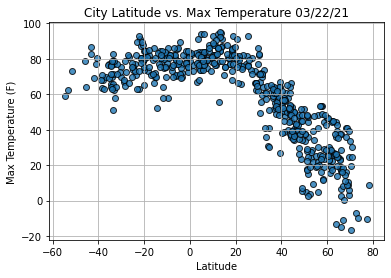

In [35]:
# import the time module
import time

# build the scatter plot for lat versus max temp
plt.scatter(lats,
           max_temps,
           edgecolor ='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

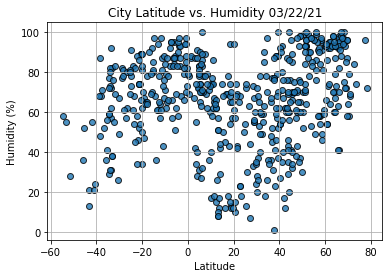

In [36]:
# build the scatter plot for lat versus max temp
plt.scatter(lats,
           humidity,
           edgecolor ='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

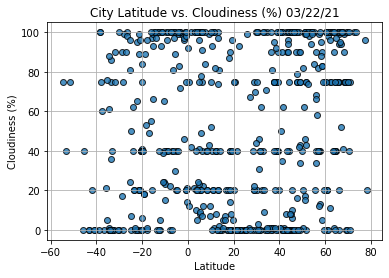

In [40]:
# build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " +time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig3.png")
plt.show()

In [ ]:
# build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed " +time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig3.png")
plt.show()